In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from cmocean import cm

import warnings
warnings.filterwarnings("ignore")


In [2]:
grid = xr.open_dataset('/ocean/atall/MOAD/grid/grid_from_lat_lon_mask999.nc')
grid

<xarray.Dataset>
Dimensions:  (lons: 9605, lats: 13585)
Coordinates:
  * lons     (lons) float64 -126.4 -126.4 -126.4 -126.4 ... -121.3 -121.3 -121.3
  * lats     (lats) float64 46.86 46.86 46.86 46.86 ... 51.1 51.1 51.1 51.1
Data variables:
    jj       (lats, lons) int16 ...
    ii       (lats, lons) int16 ...
Attributes:
    acknowledgements:      Based on find_closest point
    creator_email:         sallen@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Contributors
    creator_url:           https://salishsea-meopar-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    title:                 Grid position from lat/lons
    history:               [2021-02-25] File creation.
    Mask:                  from geometry and then corrected based on results,...

In [3]:
def calc_stats(x, y):
    stats = {}
    MSE = np.mean((y - x)**2)
    stats['RMSE'] = np.sqrt(MSE)
    stats['bias'] = np.mean(y) - np.mean(x)
    stats['WSS'] = 1 - MSE / np.mean((abs(y - np.mean(x)) + abs(x - np.mean(x)))**2)
    
    return stats


def plot_panel(ax, x, y, lims, units):
    stats = calc_stats(x, y)

    statstext = f"RMSE = {stats['RMSE']:.3f} {units}\nbias = {stats['bias']:.3f} {units}\nWSS = {stats['WSS']:.3f}"
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.9)
    c = ax.text(0.5, 0.04, statstext, bbox=props, transform=ax.transAxes, fontsize=9)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    return c

In [4]:
dfo_ctd2007 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20070101_20071231.csv')
dfo_ctd2008 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20080101_20081231.csv')
dfo_ctd2009 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20090101_20091231.csv')
dfo_ctd2010 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20100101_20101231.csv')
dfo_ctd2011 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20110101_20111231.csv')
dfo_ctd2012 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20120101_20121231.csv')
dfo_ctd2013 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20130101_20131231.csv')
dfo_ctd2014 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20140101_20141231.csv')
dfo_ctd2015 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20150101_20151231.csv')
dfo_ctd2016 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20160101_20161231.csv')
dfo_ctd2017 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20170101_20171231.csv')
dfo_ctd2018 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20180101_20181231.csv')
dfo_ctd2019 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20190101_20191231.csv')
dfo_ctd2020 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20200101_20201231.csv')
dfo_ctd2021 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_ctd_from_dfo_20210101_20211231.csv')


In [5]:
dfo_bot2007 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20070101_20071231.csv')
dfo_bot2008 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20080101_20081231.csv')
dfo_bot2009 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20090101_20091231.csv')
dfo_bot2010 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20100101_20101231.csv')
dfo_bot2011 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20110101_20111231.csv')
dfo_bot2012 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20120101_20121231.csv')
dfo_bot2013 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20130101_20131231.csv')
dfo_bot2014 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20140101_20141231.csv')
dfo_bot2015 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20150101_20151231.csv')
dfo_bot2016 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20160101_20161231.csv')
dfo_bot2017 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20170101_20171231.csv')
dfo_bot2018 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20180101_20181231.csv')
dfo_bot2019 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20190101_20191231.csv')
dfo_bot2020 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20200101_20201231.csv')
dfo_bot2021 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_dfo_20210101_20211231.csv')

In [6]:
ncei_bot2008 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20080101_20081231.csv')
ncei_bot2009 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20090101_20091231.csv')
ncei_bot2010 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20100101_20101231.csv')
ncei_bot2011 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20110101_20111231.csv')
ncei_bot2012 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20120101_20121231.csv')
ncei_bot2013 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20130101_20131231.csv')
ncei_bot2014 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20140101_20141231.csv')
ncei_bot2015 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20150101_20151231.csv')
ncei_bot2016 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20160101_20161231.csv')
ncei_bot2017 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20170101_20171231.csv')
ncei_bot2018 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_from_ncei_20180101_20181231.csv')

In [10]:
dfo_bot = pd.concat([dfo_bot2007, dfo_bot2008, dfo_bot2009, dfo_bot2010, dfo_bot2011, dfo_bot2012, dfo_bot2013, dfo_bot2014, dfo_bot2015, dfo_bot2016, dfo_bot2017, dfo_bot2018, dfo_bot2019, dfo_bot2020, dfo_bot2021], ignore_index=True)
#obs.name = 'bottle'
dfo_ctd = pd.concat([dfo_ctd2007, dfo_ctd2008, dfo_ctd2009, dfo_ctd2010, dfo_ctd2011, dfo_ctd2012, dfo_ctd2013, dfo_ctd2014, dfo_ctd2015, dfo_ctd2016, dfo_ctd2017, dfo_ctd2018, dfo_ctd2019, dfo_ctd2020, dfo_ctd2021], ignore_index=True)
ncei_bot = pd.concat([ncei_bot2008, ncei_bot2009, ncei_bot2010, ncei_bot2011, ncei_bot2012, ncei_bot2013, ncei_bot2014, ncei_bot2015, ncei_bot2016, ncei_bot2017, ncei_bot2018], ignore_index=True)

dfo_ctd

,Unnamed: 0,cid,Lon,Lat,dtUTC,Z,SA,CT,Oxygen_Dissolved,name,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_flagellates,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
0,0,1935.0,-124.08108,49.329750,2007-01-10 17:30:29,-386.31607,31.513670,9.885788,NaN,NaN,...,206,25.874981,52.069252,1.049800,0.236492,0.162356,28.590145,7.353971,291.247894,0
1,1,1935.0,-124.08108,49.329750,2007-01-10 17:30:29,-385.32645,31.512444,9.886224,NaN,NaN,...,206,25.874981,52.069252,1.049800,0.236492,0.162356,28.590145,7.353971,291.247894,0
2,2,1935.0,-124.08108,49.329750,2007-01-10 17:30:29,-384.33682,31.511520,9.886355,NaN,NaN,...,206,25.874981,52.069252,1.049800,0.236492,0.162356,28.590145,7.353971,291.247894,0
3,3,1935.0,-124.08108,49.329750,2007-01-10 17:30:29,-383.34717,31.511198,9.885674,NaN,NaN,...,206,25.874981,52.069252,1.049800,0.236492,0.162356,28.590145,7.353971,291.247894,0
4,4,1935.0,-124.08108,49.329750,2007-01-10 17:30:29,-381.36790,31.505430,9.883804,NaN,NaN,...,206,25.874981,52.069252,1.049800,0.236492,0.162356,28.590145,7.353971,291.247894,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754452,34841,229.0,-123.41700,48.725166,2021-04-14 23:04:20,-6.90000,29.687166,8.707564,277.32114,NaN,...,228,15.002037,26.409929,2.367993,1.453011,0.134458,29.117933,8.810160,297.568817,0
1754453,34842,229.0,-123.41700,48.725166,2021-04-14 23:04:20,-5.90000,29.684401,8.820169,276.87454,NaN,...,228,15.002037,26.409929,2.367993,1.453011,0.134458,29.117933,8.810160,297.568817,0
1754454,34843,229.0,-123.41700,48.725166,2021-04-14 23:04:20,-4.90000,29.682438,8.870943,276.87454,NaN,...,228,15.002037,26.409929,2.367993,1.453011,0.134458,29.117933,8.810160,297.568817,0
1754455,34844,229.0,-123.41700,48.725166,2021-04-14 23:04:20,-4.00000,29.682281,8.891172,278.21426,NaN,...,228,15.002037,26.409929,2.367993,1.453011,0.134458,29.117933,8.810160,297.568817,0


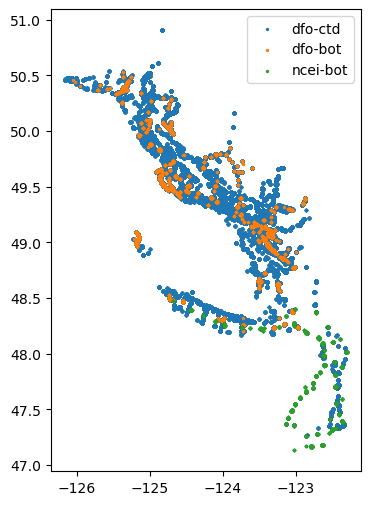

In [8]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

#ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
#ax.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
#ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)
#ax.set_ylabel('Latitude')
#ax.set_xlabel('Longitude')
#ax.set_ylim([42,52])
#ax.set_xlim([-130,-122])

# plot the location of observations
ax.scatter(dfo_ctd.Lon[dfo_ctd.name != 'bottle'], dfo_ctd.Lat[dfo_ctd.name != 'bottle'], s=2, label="dfo-ctd")
ax.scatter(dfo_bot.Lon[dfo_bot.name != 'ctd'], dfo_bot.Lat[dfo_bot.name != 'ctd'], s=2, label="dfo-bot")
ax.scatter(ncei_bot.Lon[ncei_bot.name != 'ctd'], ncei_bot.Lat[ncei_bot.name != 'ctd'], s=2, label="ncei-bot")
ax.legend()

In [9]:
datstat=dict()
for ind, istation in enumerate(ncei_bot.Station.unique()):
    datstat[istation]=ncei_bot.loc[ncei_bot.Station == istation]
    
datreg=dict()
for iregion in ncei_bot.Basin.unique():
    datreg[iregion] = ncei_bot.loc[ncei_bot.Basin==iregion]   


AttributeError: 'DataFrame' object has no attribute 'Station'